### 한국어 분석을 위한 환경 구성
[vs 빌도구도 설치]
- 내려받으실 빌드 도구를 그냥 설치하시면 됩니다.
- 설치시 C++ 도구를 선택(좌측 상단)하고 설치한다

[JDK 설치]
- 제공한 파일을 설치한다.

[JDK 환경변수 설정]
- 먼저 jdk가 설치된 경로를 파악한다.
- 탐색기에서 내PC에서 마우스 우클릭하고 속성을 클릭
- 환경변수를 눌러준다.
- 새로만들기를 눌러 다음과 같이 작성한다.
- 변수 이름 : JAVA_HOME
- 변수 값 : jdk경로
- 주피터를 완전히 종료하고 다시 실행한다.

[필요한 라이브러리 설치]
- pip install konlpy==0.5.1
- pip install jpype1
- pip install jpype1-py3


### 워드 클라우드를 사용하기 위한 설정
- pip install pytagcloud
- pip install pygame
- pip install simplejson


In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime

# 주식정보
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image


pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 데이터를 읽어온다.

In [2]:
df = pd.read_csv("data/wiki_data.csv")
df.head()

,title,content
0,파일:창3-라쉬.png,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...
1,신지우,신지우SHIN JI WOO미스터리 유튜버국적 대한민국출생1986년 5월 27일 (3...
2,임피역,이곳은 폐쇄된 교통 시설입니다.이 문서에서 서술하는 교통 시설은 폐쇄되어 더 이상 ...
3,RMB-93(소녀전선),가입 후 15일이 지나야 편집 가능한 문서입니다.RMB-93기본기본중상MOD3...
4,파일:attachment/g3_al_asha.jpg,NaN


,title,content
0,파일:창3-라쉬.png,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...
1,신지우,신지우SHIN JI WOO미스터리 유튜버국적 대한민국출생1986년 5월 27일 (3...
2,임피역,이곳은 폐쇄된 교통 시설입니다.이 문서에서 서술하는 교통 시설은 폐쇄되어 더 이상 ...
3,RMB-93(소녀전선),가입 후 15일이 지나야 편집 가능한 문서입니다.RMB-93기본기본중상MOD3...
4,파일:attachment/g3_al_asha.jpg,NaN


In [3]:
# 결측치 확인
df.isna().sum()

title      0
content    7
dtype: int64

title      0
content    7
dtype: int64

In [4]:
# 결측치 제거
df.dropna(inplace=True)
df.isna().sum()


title      0
content    0
dtype: int64

title      0
content    0
dtype: int64

### 한글 정제
- 글 자체에 한글만 남기고 모두 날린다.

In [5]:
def text_cleaning(text):
    # 한글 정규식 정의(띄어쓰기, ㄱ ~ ㅣ, 가 - 힣)
    hangul = re.compile( '[^ ㄱ-ㅣ가-힣]+')
    # 정제한다.(위 정규식에 위배되는 것들은 길이가 0인 문자열로 변환)
    result = hangul.sub('', text)
    return result

In [6]:
print(df["content"][0])

이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은 자유이용 저작물이 아닌, 독점적 저작권이 존재하는 이미지입니다. 나무위키는 본 이미지를 제한된 한도 안에서 이용합니다.※ 다음과 같은 사항을 참조하시기 바랍니다.권리자는 해당 이미지가 나무위키에 게시되어 권리자의 정당한 권리를 침해한다고 여겨진다면 문의 게시판에 문의해 주세요.해당 이미지를 업로드한 사용자는 자신의 행위에 대한 법적 책임이 부과될 수 있음을 숙지해 주세요.권리자는 해당 이미지가 나무위키에 게시되어 권리자의 정당한 권리를 침해한다고 여겨진다면 문의 게시판에 문의해 주세요.해당 이미지를 업로드한 사용자는 자신의 행위에 대한 법적 책임이 부과될 수 있음을 숙지해 주세요.1. 기본 정보2. 이미지 설명출처출처를 삽입해 주세요.날짜이미지가 만들어진 날짜를 삽입해 주세요.저작자이미지의 저작자를 삽입해 주세요.저작권이미지의 저작권과 관련된 기타 정보를 삽입해 주세요.기타기타 정보가 있으면 삽입해 주세요.이미지의 자세한 설명을 적어 주세요.
이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은 자유이용 저작물이 아닌, 독점적 저작권이 존재하는 이미지입니다. 나무위키는 본 이미지를 제한된 한도 안에서 이용합니다.※ 다음과 같은 사항을 참조하시기 바랍니다.권리자는 해당 이미지가 나무위키에 게시되어 권리자의 정당한 권리를 침해한다고 여겨진다면 문의 게시판에 문의해 주세요.해당 이미지를 업로드한 사용자는 자신의 행위에 대한 법적 책임이 부과될 수 있음을 숙지해 주세요.권리자는 해당 이미지가 나무위키에 게시되어 권리자의 정당한 권리를 침해한다고 여겨진다면 문의 게시판에 문의해 주세요.해당 이미지를 업로드한 사용자는 자신의 행위에 대한 법적 책임이 부과될 수 있음을 숙지해 주세요.1. 기본 정보2. 이미지 설명출처출처를 삽입해 주세요.날짜이미지가 만들어진 날짜를 삽입해 주세요.저작자이미지의 저작자를 삽입해 주세요.저작권이미지의 저작권과 관련된 기타 정보를 

In [7]:
print(text_cleaning(df["content"][0]))

이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 자유이용 저작물이 아닌 독점적 저작권이 존재하는 이미지입니다 나무위키는 본 이미지를 제한된 한도 안에서 이용합니다 다음과 같은 사항을 참조하시기 바랍니다권리자는 해당 이미지가 나무위키에 게시되어 권리자의 정당한 권리를 침해한다고 여겨진다면 문의 게시판에 문의해 주세요해당 이미지를 업로드한 사용자는 자신의 행위에 대한 법적 책임이 부과될 수 있음을 숙지해 주세요권리자는 해당 이미지가 나무위키에 게시되어 권리자의 정당한 권리를 침해한다고 여겨진다면 문의 게시판에 문의해 주세요해당 이미지를 업로드한 사용자는 자신의 행위에 대한 법적 책임이 부과될 수 있음을 숙지해 주세요 기본 정보 이미지 설명출처출처를 삽입해 주세요날짜이미지가 만들어진 날짜를 삽입해 주세요저작자이미지의 저작자를 삽입해 주세요저작권이미지의 저작권과 관련된 기타 정보를 삽입해 주세요기타기타 정보가 있으면 삽입해 주세요이미지의 자세한 설명을 적어 주세요
이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 자유이용 저작물이 아닌 독점적 저작권이 존재하는 이미지입니다 나무위키는 본 이미지를 제한된 한도 안에서 이용합니다 다음과 같은 사항을 참조하시기 바랍니다권리자는 해당 이미지가 나무위키에 게시되어 권리자의 정당한 권리를 침해한다고 여겨진다면 문의 게시판에 문의해 주세요해당 이미지를 업로드한 사용자는 자신의 행위에 대한 법적 책임이 부과될 수 있음을 숙지해 주세요권리자는 해당 이미지가 나무위키에 게시되어 권리자의 정당한 권리를 침해한다고 여겨진다면 문의 게시판에 문의해 주세요해당 이미지를 업로드한 사용자는 자신의 행위에 대한 법적 책임이 부과될 수 있음을 숙지해 주세요 기본 정보 이미지 설명출처출처를 삽입해 주세요날짜이미지가 만들어진 날짜를 삽입해 주세요저작자이미지의 저작자를 삽입해 주세요저작권이미지의 저작권과 관련된 기타 정보를 삽입해 주세요기타기타 정보가 있으면 삽입해 주세요이미지의 자세한 설

In [8]:
# 한글 정제
df["title"] = df["title"].apply(lambda x: text_cleaning(x))
df["content"] = df["content"].apply(lambda x : text_cleaning(x))
df

,title,content
0,파일창라쉬,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...
1,신지우,신지우 미스터리 유튜버국적 대한민국출생년 월 일 세 서울특별시신체 형가족부모님자...
2,임피역,이곳은 폐쇄된 교통 시설입니다이 문서에서 서술하는 교통 시설은 폐쇄되어 더 이상 운...
3,소녀전선,가입 후 일이 지나야 편집 가능한 문서입니다기본기본중상 개조 후기본중상번호등급분...
5,인퍼노,개요 영웅 목록 유닛 목록 레벨 임프 패밀리어 버민 레벨 혼드 데몬 혼드 ...
...,...,...
94,알고있지만,금토 드라마 펼치기 접기 토요 드라마 알고있지만 전체 방송 프로그램 보기토요 드...
95,망포역,로그인 후 편집 가능한 문서입니다 망포역청량리 방면 영통 수인분당선인천...
96,파일창일사담,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...
97,퍼니싱 그레이 레이븐구조체,상위 문서 퍼니싱 그레이 레이븐스마트폰 에 대응하는 레이아웃 적용문서 내 명칭 ...


,title,content
0,파일창라쉬,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...
1,신지우,신지우 미스터리 유튜버국적 대한민국출생년 월 일 세 서울특별시신체 형가족부모님자...
2,임피역,이곳은 폐쇄된 교통 시설입니다이 문서에서 서술하는 교통 시설은 폐쇄되어 더 이상 운...
3,소녀전선,가입 후 일이 지나야 편집 가능한 문서입니다기본기본중상 개조 후기본중상번호등급분...
5,인퍼노,개요 영웅 목록 유닛 목록 레벨 임프 패밀리어 버민 레벨 혼드 데몬 혼드 ...
...,...,...
94,알고있지만,금토 드라마 펼치기 접기 토요 드라마 알고있지만 전체 방송 프로그램 보기토요 드...
95,망포역,로그인 후 편집 가능한 문서입니다 망포역청량리 방면 영통 수인분당선인천...
96,파일창일사담,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...
97,퍼니싱 그레이 레이븐구조체,상위 문서 퍼니싱 그레이 레이븐스마트폰 에 대응하는 레이아웃 적용문서 내 명칭 ...


In [9]:
# 말뭉치 생성을 위해 모든 문장을 하나의 문장으로 합친다.
title_corpus = ''.join(df["title"])
content_corpus = "".join(df["content"])

# content_corpus

In [10]:
# 형태소 분석 예제

tagger1  = Okt()
tagger2 = Kkma()
tagger3 = Hannanum()
# tagger4 = Mecab()
tagger5 = Komoran()

print(tagger1.morphs("동해물과 백두산이 마르고 닳도록"))
print(tagger2.morphs("동해물과 백두산이 마르고 닳도록"))
print(tagger3.morphs("동해물과 백두산이 마르고 닳도록"))
# print(tagger4.morphs("동해물과 백두산이 마르고 닳도록"))
print(tagger5.morphs("동해물과 백두산이 마르고 닳도록"))


['동', '해물', '과', '백두산', '이', '마르고', '닳도록']
['동', '해물', '과', '백두산', '이', '마르고', '닳도록']
['동하', '어', '물', '과', '백두산', '이', '마르', '고', '닳', '도록']
['동하', '어', '물', '과', '백두산', '이', '마르', '고', '닳', '도록']
['동해물', '과', '백두산', '이', '마르', '고', '닳', '도록']
['동해물과 백두산이', '마르고', '닳', '도록']
['동해물', '과', '백두산', '이', '마르', '고', '닳', '도록']
['동해물과 백두산이', '마르고', '닳', '도록']


In [11]:
tagger = Okt()

# 명사만 추출
title_nouns = tagger.nouns(title_corpus)
content_nouns = tagger.nouns(content_corpus)

# print(title_nouns)
# print(content_nouns)

In [12]:
# 각 단어에 대한 빈도수를 계산한다.
title_count = Counter(title_nouns)
content_count = Counter(content_nouns)

# print(title_count)
# print(content_nouns)

### 키워드 다듬기

In [13]:
# 워드 클라우드는 두 글자 이상만 인식할 수 있기 때문에 두 글자 이상인 것만 남겨둔다. 
print(len(title_count))
print(len(content_count))

title_dict = {}
for key in title_count:
    # 이름이 1보다 크다면 담아준다.
    if len(key) > 1 :
        title_dict[key] = title_count[key]
        
content_dict = {}
for key in content_count:
    if len(key) > 1 :
        content_dict[key] = content_count[key]
        
# 다시 Counter 객체로 생성한다.
remove_title_count = Counter(title_dict)
remove_content_count = Counter(content_dict)

print(len(remove_title_count))
print(len(remove_content_count))

145
18951
127
18135
145
18951
127
18135


### 워드 클라우드 설정

In [14]:
# 가장 빈도수가 높은 단어 100개를 선정한다.
ranked_title_tags = remove_title_count.most_common(20000)
ranked_content_tags = remove_content_count.most_common(20000)

ranked_content_tags

[('문서', 2965),
 ('문단', 2959),
 ('이전', 2914),
 ('역사', 2839),
 ('게임', 1094),
 ('오락실', 737),
 ('때문', 641),
 ('피해', 640),
 ('공격', 614),
 ('단계', 588),
 ('스킬', 575),
 ('쿠키', 566),
 ('이후', 565),
 ('경우', 559),
 ('사용', 547),
 ('자신', 510),
 ('사람', 504),
 ('철권', 490),
 ('기체', 450),
 ('토론', 445),
 ('사항', 420),
 ('시간', 416),
 ('시즌', 413),
 ('상태', 410),
 ('합의', 409),
 ('다른', 406),
 ('정도', 400),
 ('모습', 377),
 ('잭스', 367),
 ('일본', 352),
 ('위치', 337),
 ('펌프', 332),
 ('기기', 316),
 ('경기', 314),
 ('후보', 305),
 ('사건', 299),
 ('한국', 297),
 ('시작', 295),
 ('내용', 295),
 ('물리', 290),
 ('폐업', 285),
 ('현재', 282),
 ('다화', 272),
 ('정글', 269),
 ('부분', 267),
 ('상황', 261),
 ('증가', 258),
 ('능력', 257),
 ('승률', 257),
 ('방송', 255),
 ('대원', 255),
 ('승리', 254),
 ('대상', 252),
 ('마스크', 250),
 ('일반', 248),
 ('생각', 247),
 ('다시', 246),
 ('공손찬', 246),
 ('대한', 244),
 ('문제', 243),
 ('본인', 239),
 ('추가', 236),
 ('하나', 233),
 ('영상', 229),
 ('속성', 228),
 ('기록', 228),
 ('상대', 226),
 ('사실', 220),
 ('운영', 219),
 ('가장', 218),
 ('동안', 215)

[('문서', 2965),
 ('문단', 2959),
 ('이전', 2914),
 ('역사', 2839),
 ('게임', 1094),
 ('오락실', 737),
 ('때문', 641),
 ('피해', 640),
 ('공격', 614),
 ('단계', 588),
 ('스킬', 575),
 ('쿠키', 566),
 ('이후', 565),
 ('경우', 559),
 ('사용', 547),
 ('자신', 510),
 ('사람', 504),
 ('철권', 490),
 ('기체', 450),
 ('토론', 445),
 ('사항', 420),
 ('시간', 416),
 ('시즌', 413),
 ('상태', 410),
 ('합의', 409),
 ('다른', 406),
 ('정도', 400),
 ('모습', 377),
 ('잭스', 367),
 ('일본', 352),
 ('위치', 337),
 ('펌프', 332),
 ('기기', 316),
 ('경기', 314),
 ('후보', 305),
 ('사건', 299),
 ('한국', 297),
 ('시작', 295),
 ('내용', 295),
 ('물리', 290),
 ('폐업', 285),
 ('현재', 282),
 ('다화', 272),
 ('정글', 269),
 ('부분', 267),
 ('상황', 261),
 ('증가', 258),
 ('능력', 257),
 ('승률', 257),
 ('방송', 255),
 ('대원', 255),
 ('승리', 254),
 ('대상', 252),
 ('마스크', 250),
 ('일반', 248),
 ('생각', 247),
 ('다시', 246),
 ('공손찬', 246),
 ('대한', 244),
 ('문제', 243),
 ('본인', 239),
 ('추가', 236),
 ('하나', 233),
 ('영상', 229),
 ('속성', 228),
 ('기록', 228),
 ('상대', 226),
 ('사실', 220),
 ('운영', 219),
 ('가장', 218),
 ('동안', 215)

In [15]:
# 워드 클라우드를 위한 단어 사전을 생성한다.
title_tag_list = pytagcloud.make_tags(ranked_title_tags)
content_tag_list = pytagcloud.make_tags(ranked_content_tags)

### 폰트 설정
- 워드 클라우드는 한글 폰트가 없기 때문에 오류가 발생한다.
- 한글 폰트 등록을 해줘야한다.
- https://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf
- C:\ProgramData\Anaconda3\Lib\site-packages\pytagcloud\fonts 이 경로에 넣어주자.
- 같은 폴더의 font.json 파일에 다음과 같이 등록해준다.
- {
       "name" : "NanumGothic",
       "ttf" : "NanumGothic.ttf",
       "web" : "http://fonts.googleapis.com/css?family=Nanum+Gothic"
}

In [16]:
pytagcloud.create_tag_image(title_tag_list, "title_word.jpg", size=(900, 600), 
                            fontname="NanumGothic", rectangular=False)

In [17]:
pytagcloud.create_tag_image(content_tag_list, "content_word.jpg", size=(900, 600), 
                            fontname="NanumGothic", rectangular=False)

title
title


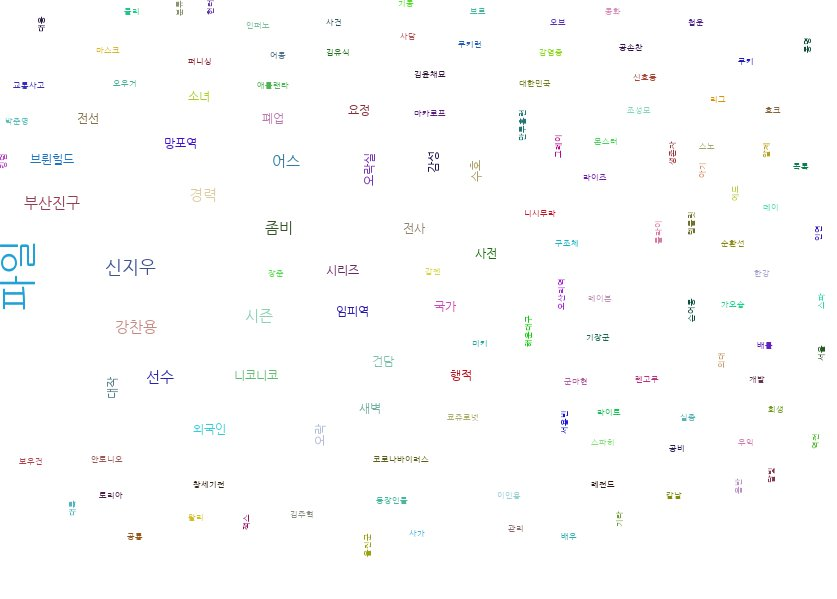

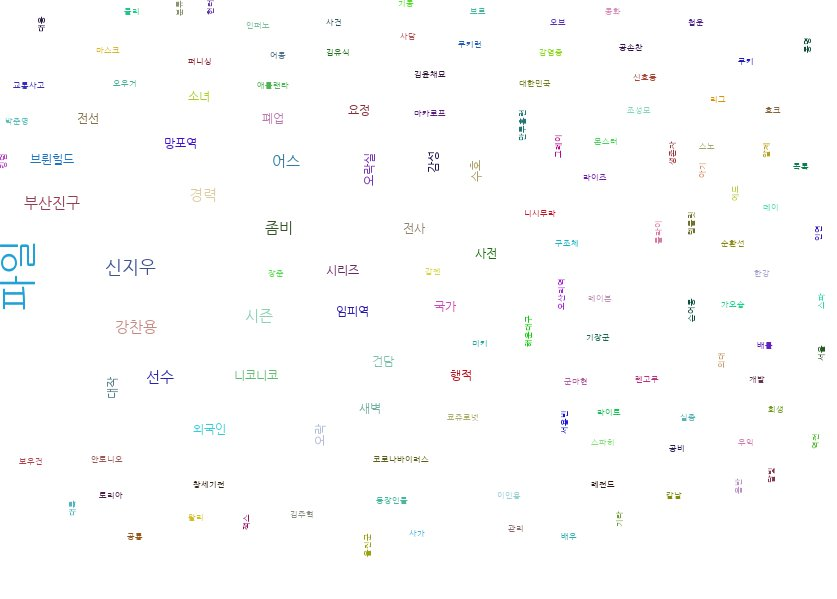

In [18]:
print("title")
Image(filename="title_word.jpg")

content
content


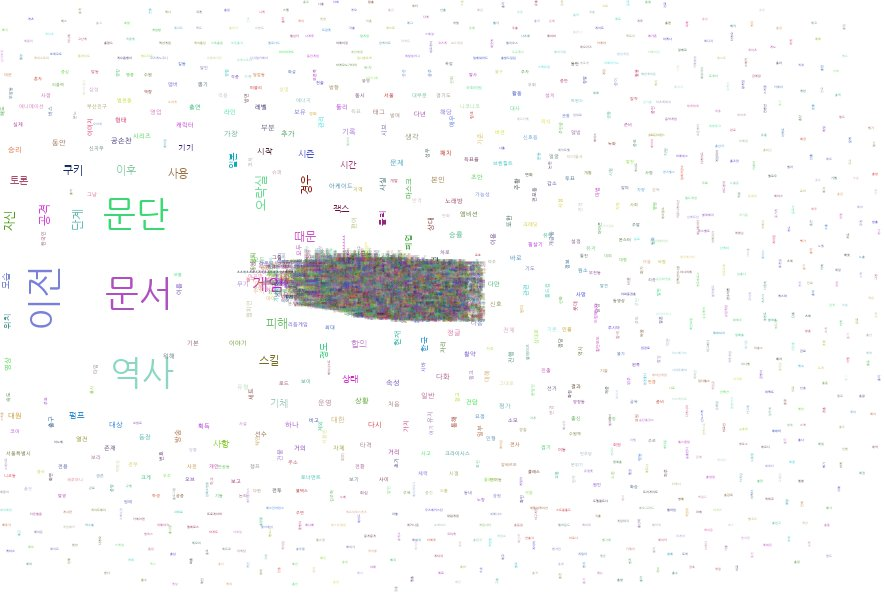

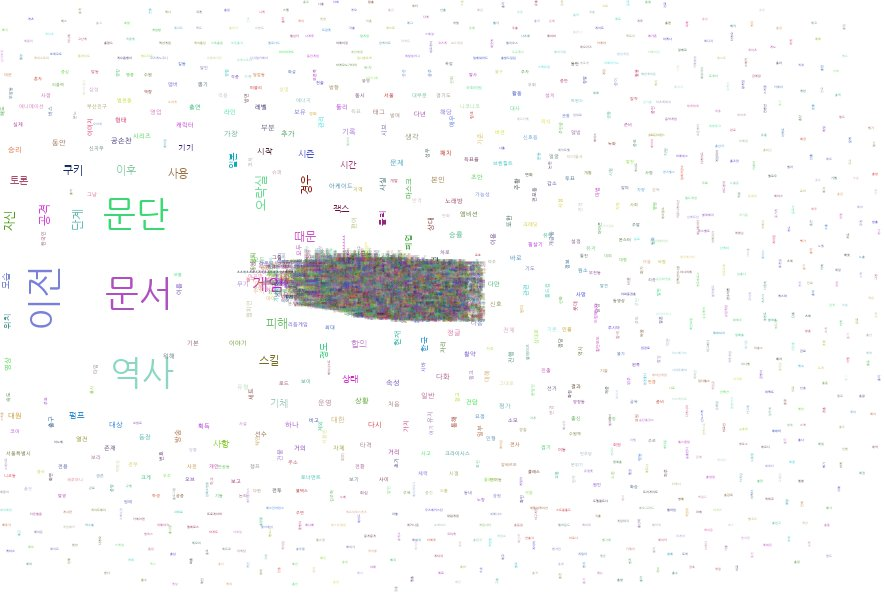

In [19]:
print("content")
Image(filename="content_word.jpg")